Initial exploratory analyses of demographic data

In [2]:
import os,sys
import pandas,numpy
import seaborn as sns
import matplotlib.pyplot as plt

# this is kludgey but it works
sys.path.append('../utils')

from selfregulation.utils.metadata_utils import load_metadata
from selfregulation.utils.utils import get_info,get_behav_data

%matplotlib inline

%load_ext rpy2.ipython
from IPython.display import display, HTML
pandas.set_option('max_colwidth', 100)


basedir=get_info('base_directory')
dataset=get_info('dataset')



/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
demog=get_behav_data(dataset,'demographics.csv',full_dataset=True)
#pandas.read_csv(os.path.join(derived_dir,'surveydata/demographics.tsv'),delimiter='\t',index_col=0)
demog_metadata=load_metadata('demographics')
del demog['RelationshipStatus']
del demog['RentOwn']
badweight=demog['WeightPounds']<80
print('excluding %d subjects for weight < 80'%numpy.sum(badweight))
demog['WeightPounds'].loc[badweight]=numpy.nan
badheight=demog['HeightInches']<36
print('excluding %d subjects for height < 36'%numpy.sum(badheight))
demog['HeightInches'].loc[badheight]=numpy.nan

demog=demog.assign(BMI=demog['WeightPounds']*0.45 / (demog['HeightInches']*0.025)**2)
#demog['BMI']=demog['WeightPounds']*0.45 / (demog['HeightInches']*0.025)**2
demog.describe().T

Getting datasets...:
 /Users/poldrack/code/Self_Regulation_Ontology/Data/Complete_12-15-2016
excluding 1 subjects for weight < 80
excluding 3 subjects for height < 36


/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,count,mean,std,min,25%,50%,75%,max
Sex,522.0,0.501916,0.500476,0.000000,0.00000,1.00000,1.000000,1.000000
Age,522.0,33.630268,7.877863,20.000000,27.00000,32.00000,39.000000,59.000000
HispanicLatino,522.0,0.070881,0.256873,0.000000,0.00000,0.00000,0.000000,1.000000
HighestEducation,522.0,3.375479,0.898288,1.000000,3.00000,3.00000,4.000000,6.000000
HeightInches,519.0,67.566474,4.337467,50.000000,65.00000,68.00000,70.000000,79.000000
WeightPounds,521.0,179.907869,50.373596,86.000000,145.00000,170.00000,200.000000,373.000000
DivorceCount,522.0,0.155172,0.430219,0.000000,0.00000,0.00000,0.000000,3.000000
LongestRelationship,522.0,85.191571,87.199980,0.000000,24.00000,60.00000,120.000000,1040.000000
RelationshipNumber,522.0,3.333333,1.600144,0.000000,2.00000,3.00000,5.000000,6.000000
ChildrenNumber,522.0,0.781609,1.226001,0.000000,0.00000,0.00000,1.000000,6.000000


In [5]:
print('Percentage with children: %0.1f'%(numpy.mean(demog.ChildrenNumber>1)*100))
print('Percentage ever divorced: %0.1f'%(numpy.mean(demog.DivorceCount>0)*100))
print('Percentage with current gambling problem: %0.1f'%(numpy.mean(demog.GamblingProblem>1)*100))
print('Percentage with at least one traffic ticket in last year: %0.1f'%(numpy.mean(demog.TrafficTicketsLastYearCount>0)*100))
print('Percentage arrested at least once: %0.1f'%(numpy.mean(demog.ArrestedChargedLifeCount>0)*100))
print('Percentage arrested more than once: %0.1f'%(numpy.mean(demog.ArrestedChargedLifeCount>1)*100))
print('Percentage with >$10,000 credit card debt: %0.1f'%(numpy.mean(demog.CreditCardDebt>3)*100))

Percentage with children: 24.5
Percentage ever divorced: 13.0
Percentage with current gambling problem: 1.5
Percentage with at least one traffic ticket in last year: 8.0
Percentage arrested at least once: 21.5
Percentage arrested more than once: 10.3
Percentage with >$10,000 credit card debt: 7.9


30.65 percent subjects with BMI>30 (obese)
7.28 percent subjects with BMI>40 (extreme obesity)


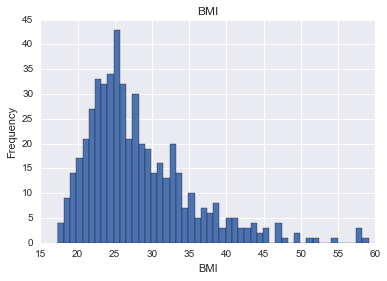

In [6]:
demog.BMI.hist(bins=50)
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
print('%0.2f percent subjects with BMI>30 (obese)'%(numpy.mean(demog.BMI>30)*100))
print('%0.2f percent subjects with BMI>40 (extreme obesity)'%(numpy.mean(demog.BMI>40)*100))

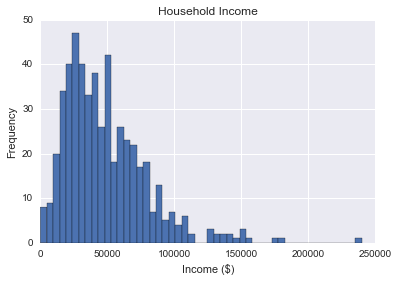

In [7]:
demog.HouseholdIncome.hist(bins=50)
plt.title('Household Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')


([<matplotlib.axis.XTick at 0x119cf08d0>,
 <a list of 6 Text xticklabel objects>)

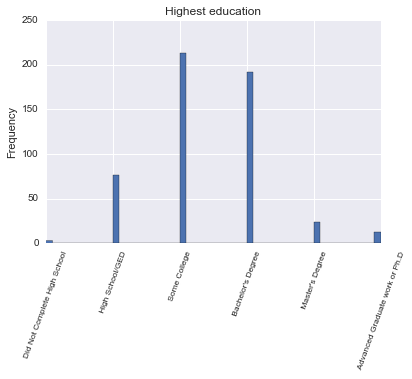

In [17]:
demog.HighestEducation.hist(bins=50)
plt.title('Highest education')
plt.ylabel('Frequency')
educlevels=[demog_metadata['HighestEducation']['Levels']['%d'%i] for i in range(1,7)]
plt.xticks(range(1,7), educlevels, size='small',rotation=70)


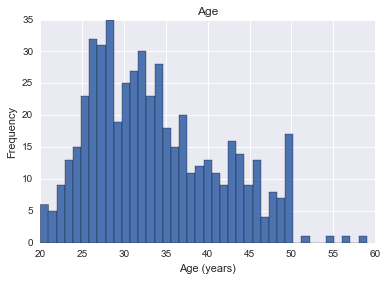

In [8]:
demog.Age.hist(bins=40)
plt.title('Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

Summarize race information

In [8]:
print('Percentage reporting each race category')
display(demog.Race.value_counts()/demog.shape[0]*100)

Percentage reporting each race category


White                                         85.632184
 Black or African American                     6.896552
Chinese                                        1.724138
Other                                          1.149425
 Vietnamese                                    0.957854
 Filipino                                      0.766284
 Asian Indian                                  0.574713
Choose not to respond                          0.574713
 Other Asian                                   0.574713
 Middle Eastern or North African               0.383142
Japanese                                       0.383142
 Native Hawaiian or Other Pacific Islander     0.191571
Korean                                         0.191571
Name: Race, dtype: float64

dropping: ['RetirementPercentStocks', 'MortgageDebt', 'CarDebt', 'EducationDebt', 'CreditCardDebt', 'OtherDebtAmount']


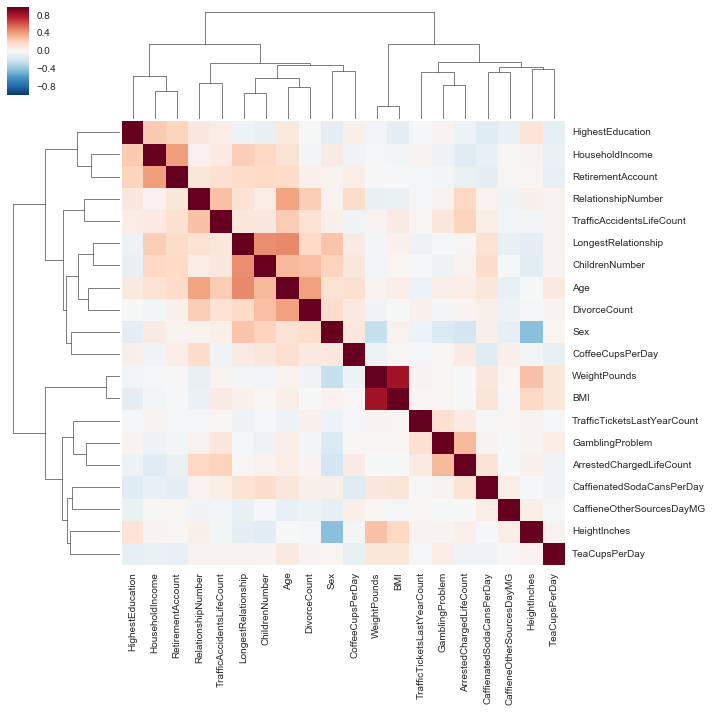

In [9]:

demog_numeric=demog.copy()
demog_numeric=demog_numeric.select_dtypes(include=['float64','int64'])
nacount=numpy.sum(numpy.isnan(demog_numeric),0)
badcols=nacount[nacount>5]
print('dropping:',list(badcols.index))
for badcol in list(badcols.index):
    demog_numeric.drop(badcol, axis=1, inplace=True)
demog_numeric.drop('HispanicLatino', axis=1, inplace=True)
demog_numeric=demog_numeric.fillna(0)
dcc=demog_numeric.corr()
g=sns.clustermap(dcc,method='ward')
_=plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

### Health status

For the psychological state variables, I binarize them so that the mean expresses the proportion of subjects reporting any level of these symptoms.

In [35]:
health_metadata=load_metadata('health')
healthdata=get_behav_data(dataset,'health.csv',full_dataset=True)

#pandas.read_csv(os.path.join(derived_dir,'surveydata/health.tsv'),delimiter='\t',index_col=0)
symptoms=['Nervous','Hopeless','RestlessFidgety','Depressed','EverythingIsEffort','Worthless']
#for s in symptoms:
#    healthdata[s]=(healthdata[s]>1).astype('int')

d=healthdata.describe().T
itemtext=[health_metadata[i]['Description'] for i in d.index]

d['Itemtext']=itemtext
display(d)

Getting datasets...:
 /Users/poldrack/code/Self_Regulation_Ontology/Data/Complete_12-15-2016


,count,mean,std,min,25%,50%,75%,max,Itemtext
Nervous,522.0,1.185824,1.037655,0.0,0.0,1.0,2.0,4.0,... nervous?
Hopeless,522.0,0.854406,1.096964,0.0,0.0,0.0,1.0,4.0,... hopeless?
RestlessFidgety,522.0,1.149425,1.010829,0.0,0.0,1.0,2.0,4.0,... restless or fidgety?
Depressed,522.0,0.724138,1.080517,0.0,0.0,0.0,1.0,4.0,... so depressed that nothing could cheer you up?
EverythingIsEffort,522.0,1.118774,1.131164,0.0,0.0,1.0,2.0,4.0,... that everything was an effort?
Worthless,522.0,0.735632,1.078064,0.0,0.0,0.0,1.0,4.0,... worthless?
Last30DaysUsual,522.0,3.162835,0.954994,0.0,3.0,3.0,3.0,6.0,Q2: The last six questions asked about feelings that might have occurred during the past 30\nday...
DaysLostLastMonth,392.0,1.492347,3.468520,-2.0,0.0,0.0,2.0,30.0,"Q3: During the past 30 days, how many days out of 30 were you totally unable to work or\ncarry o..."
DaysHalfLastMonth,401.0,2.206983,3.630365,-1.0,0.0,0.0,3.0,20.0,"Q4: Not counting the days you reported in response to Q3, how many days in the past\n30 were you..."
DoctorVisitsLastMonth,426.0,0.140845,0.747623,-3.0,0.0,0.0,0.0,10.0,"Q5: During the past 30 days, how many times did you see a doctor or other health\nprofessional a..."


{'Description': '... so depressed that nothing could cheer you up?', 'LevelsOrig': {'3': ' Some of the time', '4': ' A little of the time', '5': ' None of the time', '2': ' Most of the time', '1': 'All of the time'}, 'Levels': {'0': ' None of the time', '3': ' Most of the time', '4': 'All of the time', '2': ' Some of the time', '1': ' A little of the time'}}
0 314
1 102
2 60
3 28
4 18


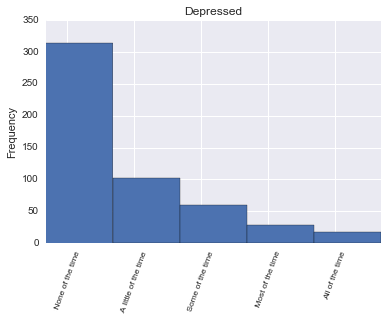

In [47]:
print(health_metadata['Depressed'])
healthdata.Depressed.hist(bins=5)
plt.title('Depressed')
plt.ylabel('Frequency')
educlevels=[health_metadata['Depressed']['Levels']['%d'%i] for i in range(5)]
plt.xticks(numpy.arange(0,5)*0.8+0.25, educlevels, size='small',rotation=70)
for i in range(5):
    print(i,(healthdata.Depressed==i).sum())


{'Description': '... worthless?', 'LevelsOrig': {'3': ' Some of the time', '4': ' A little of the time', '5': ' None of the time', '2': ' Most of the time', '1': 'All of the time'}, 'Levels': {'0': ' None of the time', '3': ' Most of the time', '4': 'All of the time', '2': ' Some of the time', '1': ' A little of the time'}}
0 309
1 105
2 63
3 27
4 18


array([[ 1.        ,  0.80068389],
       [ 0.80068389,  1.        ]])

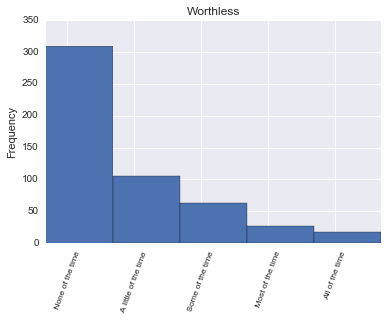

In [50]:
print(health_metadata['Worthless'])
healthdata.Worthless.hist(bins=5)
plt.title('Worthless')
plt.ylabel('Frequency')
educlevels=[health_metadata['Worthless']['Levels']['%d'%i] for i in range(5)]
plt.xticks(numpy.arange(0,5)*0.8+0.25, educlevels, size='small',rotation=70)
for i in range(5):
    print(i,(healthdata.Worthless==i).sum())
numpy.corrcoef(healthdata.Worthless,healthdata.Depressed)

### Medical diagnoses

In [11]:
disorders=healthdata['DiseaseDiagnoses'].unique()
ddata=[]
for d in disorders:
    diag=healthdata.query('DiseaseDiagnoses=="%s"'%d)
    ddata.append([d.lstrip(),diag.shape[0]/healthdata.shape[0]])
df=pandas.DataFrame(ddata,columns=['Diagnosis','Frequency(Percent)'])
display(df)

,Diagnosis,Frequency(Percent)
0,None,0.827586
1,High Blood Pressure,0.068966
2,Metabolic Syndrome,0.007663
3,Cancer,0.005747
4,Type II diabetes,0.024904
5,Other,0.049808
6,Sleep Apnea,0.013410
7,Heart Disease,0.001916


### Psychiatric diagnoses

In [12]:
disorders=healthdata['PsychDiagnoses'].unique()
ddata=[]
for d in disorders:
    diag=healthdata.query('PsychDiagnoses=="%s"'%d)
    ddata.append([d.lstrip(),diag.shape[0]/healthdata.shape[0]])
df=pandas.DataFrame(ddata,columns=['Diagnosis','Frequency(Percent)'])
display(df)

,Diagnosis,Frequency(Percent)
0,None,0.662835
1,Depression,0.193487
2,Anxiety Disorder,0.053640
3,ADHD,0.034483
4,Obessive Compulsive Disorder,0.003831
5,Schizophrenia,0.001916
6,Anorexi Nervosa,0.017241
7,Alcohol Dependency,0.003831
8,Manic-Depressive (Bilpolar) illness,0.011494
9,Drug Dependency,0.009579


### Alcohol/Drug use

In [13]:
drug_metadata=load_metadata('alcohol_drugs')
drugdata=get_behav_data(dataset,'alcohol_drugs.csv',full_dataset=True)

d=drugdata.describe().T
itemtext=[drug_metadata[i]['Description'] for i in d.index]

d['Itemtext']=itemtext
display(d)

Getting datasets...:
 /Users/poldrack/code/Self_Regulation_Ontology/Data/Complete_12-15-2016


,count,mean,std,min,25%,50%,75%,max,Itemtext
LifetimeSmoke100Cigs,522.0,0.492337,0.500421,0.0,0.0,0.0,1.00,1.0,"Altogether, have you smoked at least 100 or more cigarettes in your entire lifetime?"
HowLongSmoked,522.0,2.756705,3.097923,0.0,0.0,0.5,6.00,7.0,How long have you smoked (cumulatively)?
SmokeEveryDay,522.0,0.823755,1.186768,0.0,0.0,0.0,1.75,3.0,"Do you now smoke cigarettes every day, some days or not at all?"
CigsPerDay,522.0,0.931034,1.703286,0.0,0.0,0.0,1.00,6.0,"On average, how many cigarettes do you now smoke a day (1 pack = 20 cigarettes)?"
HowSoonSmokeAfterWaking,522.0,0.672414,1.309190,0.0,0.0,0.0,1.00,5.0,How soon after you wake up do you smoke your first cigarette?
AlcoholHowOften,522.0,1.526820,1.154250,0.0,1.0,1.0,2.00,4.0,How often do you have a drink containing alcohol?
AlcoholHowManyDrinksDay,522.0,1.555556,0.930285,1.0,1.0,1.0,2.00,5.0,How many drinks containing alcohol do you have on a typical day when you are drinking?
AlcoholHowOften6Drinks,522.0,0.616858,0.892893,0.0,0.0,0.0,1.00,4.0,How often do you have six or more drinks on one occasion?
HowOftenCantStopDrinking,522.0,0.224138,0.648009,0.0,0.0,0.0,0.00,4.0,How often during the last year have you found that you were not able to stop drinking once you h...
HowOftenFailedActivitiesDrinking,522.0,0.160920,0.508059,0.0,0.0,0.0,0.00,4.0,How often during the last year have you failed to do what was normally expected from you because...


In [14]:
print('Percentage of lifetime smokers (100 cigs): %0.2f'%(100*numpy.mean(drugdata.LifetimeSmoke100Cigs>0)))
print('Percentage of current smokers: %0.2f'%(100*numpy.mean(drugdata.CigsPerDay>0)))
print('Percentage of cannabis users (at all): %0.2f'%(100*numpy.mean(drugdata.CannabisHowOften>0)))
print('Percentage of cannabis users (at least once/month): %0.2f'%(100*numpy.mean(drugdata.CannabisHowOften>1)))
print('Percentage of daily cannabis users: %0.2f'%(100*numpy.mean(drugdata.CannabisHowOften>3)))
q=drugdata.query('AlcoholHowOften>3 & AlcoholHowManyDrinksDay>1')
print('Percentage of heavy drinkers (4+ times per week, 3+ drinks per time): %0.2f'%(100*float(q.shape[0]/drugdata.shape[0])))
print('Percentage reporting trouble stopping their drinking: %0.2f'%(100*numpy.mean(drugdata.HowOftenCantStopDrinking>3)))







Percentage of lifetime smokers (100 cigs): 49.23
Percentage of current smokers: 27.78
Percentage of cannabis users (at all): 24.33
Percentage of cannabis users (at least once/month): 14.94
Percentage of daily cannabis users: 9.58
Percentage of heavy drinkers (4+ times per week, 3+ drinks per time): 4.60
Percentage reporting trouble stopping their drinking: 0.57


In [15]:
print('Cigarettes smoked per day')
cigdata=[]
for i in drug_metadata['CigsPerDay']['Levels']:
    q=drugdata.query('CigsPerDay == %d'%float(i))
    cigdata.append([int(i),drug_metadata['CigsPerDay']['Levels'][i],q.shape[0]])
df=pandas.DataFrame(cigdata,columns=['Resp','Frequency','Proportion'])
df=df.sort_values(by='Resp')
display(df)

Cigarettes smoked per day


,Resp,Frequency,Proportion
2,0,I don't smoke,377
1,1,Less than a cigarette a day,27
5,2,<5,16
0,3,5-10,28
3,4,10-20,34
6,5,1 pack,33
7,6,2 packs,7
4,7,More than 2 packs,0


### QA analyses for demographic data

The files are saved as PDF rather than printed, to make them easier to look at in high resolution, since Jupyter doesn't do a great job of displaying R output.

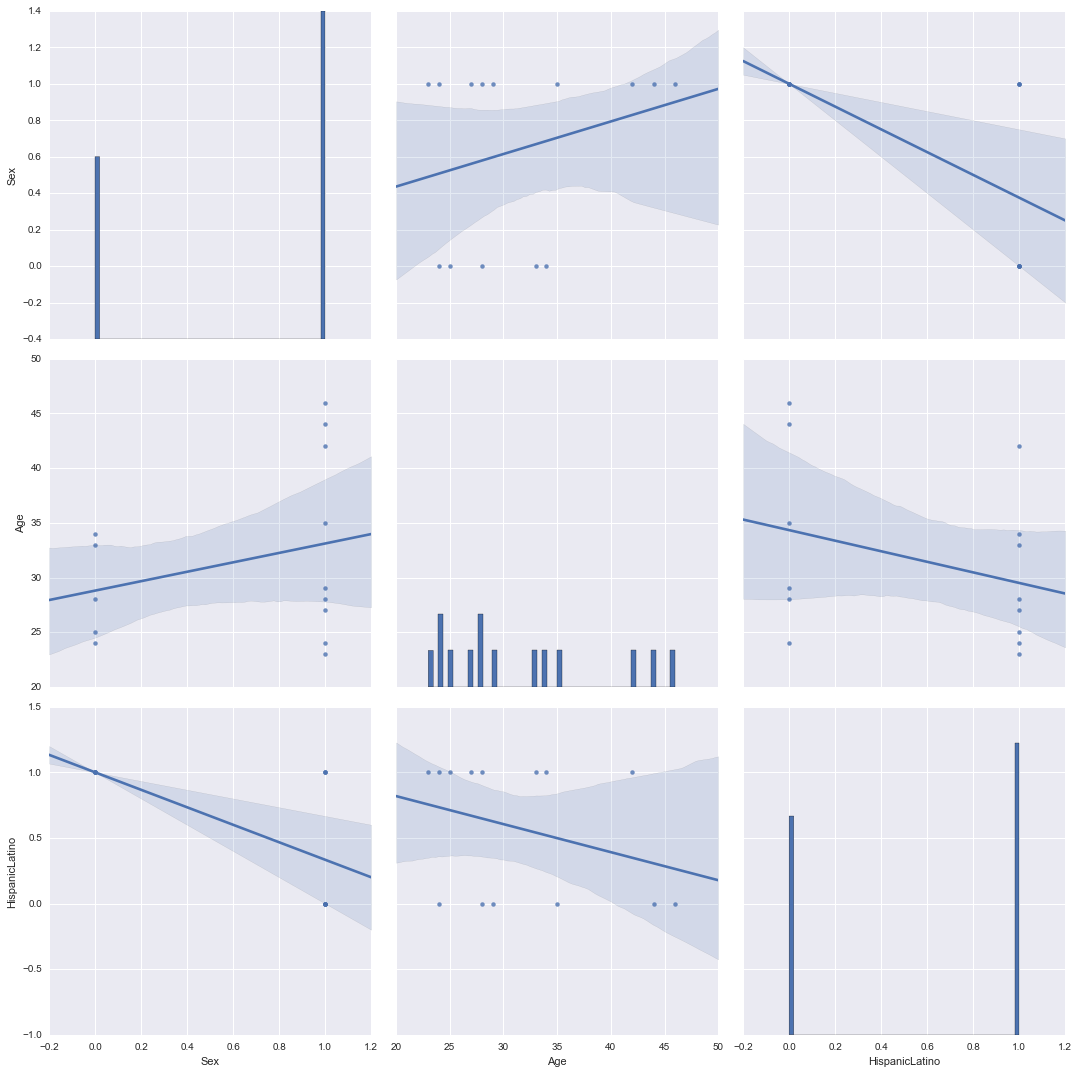

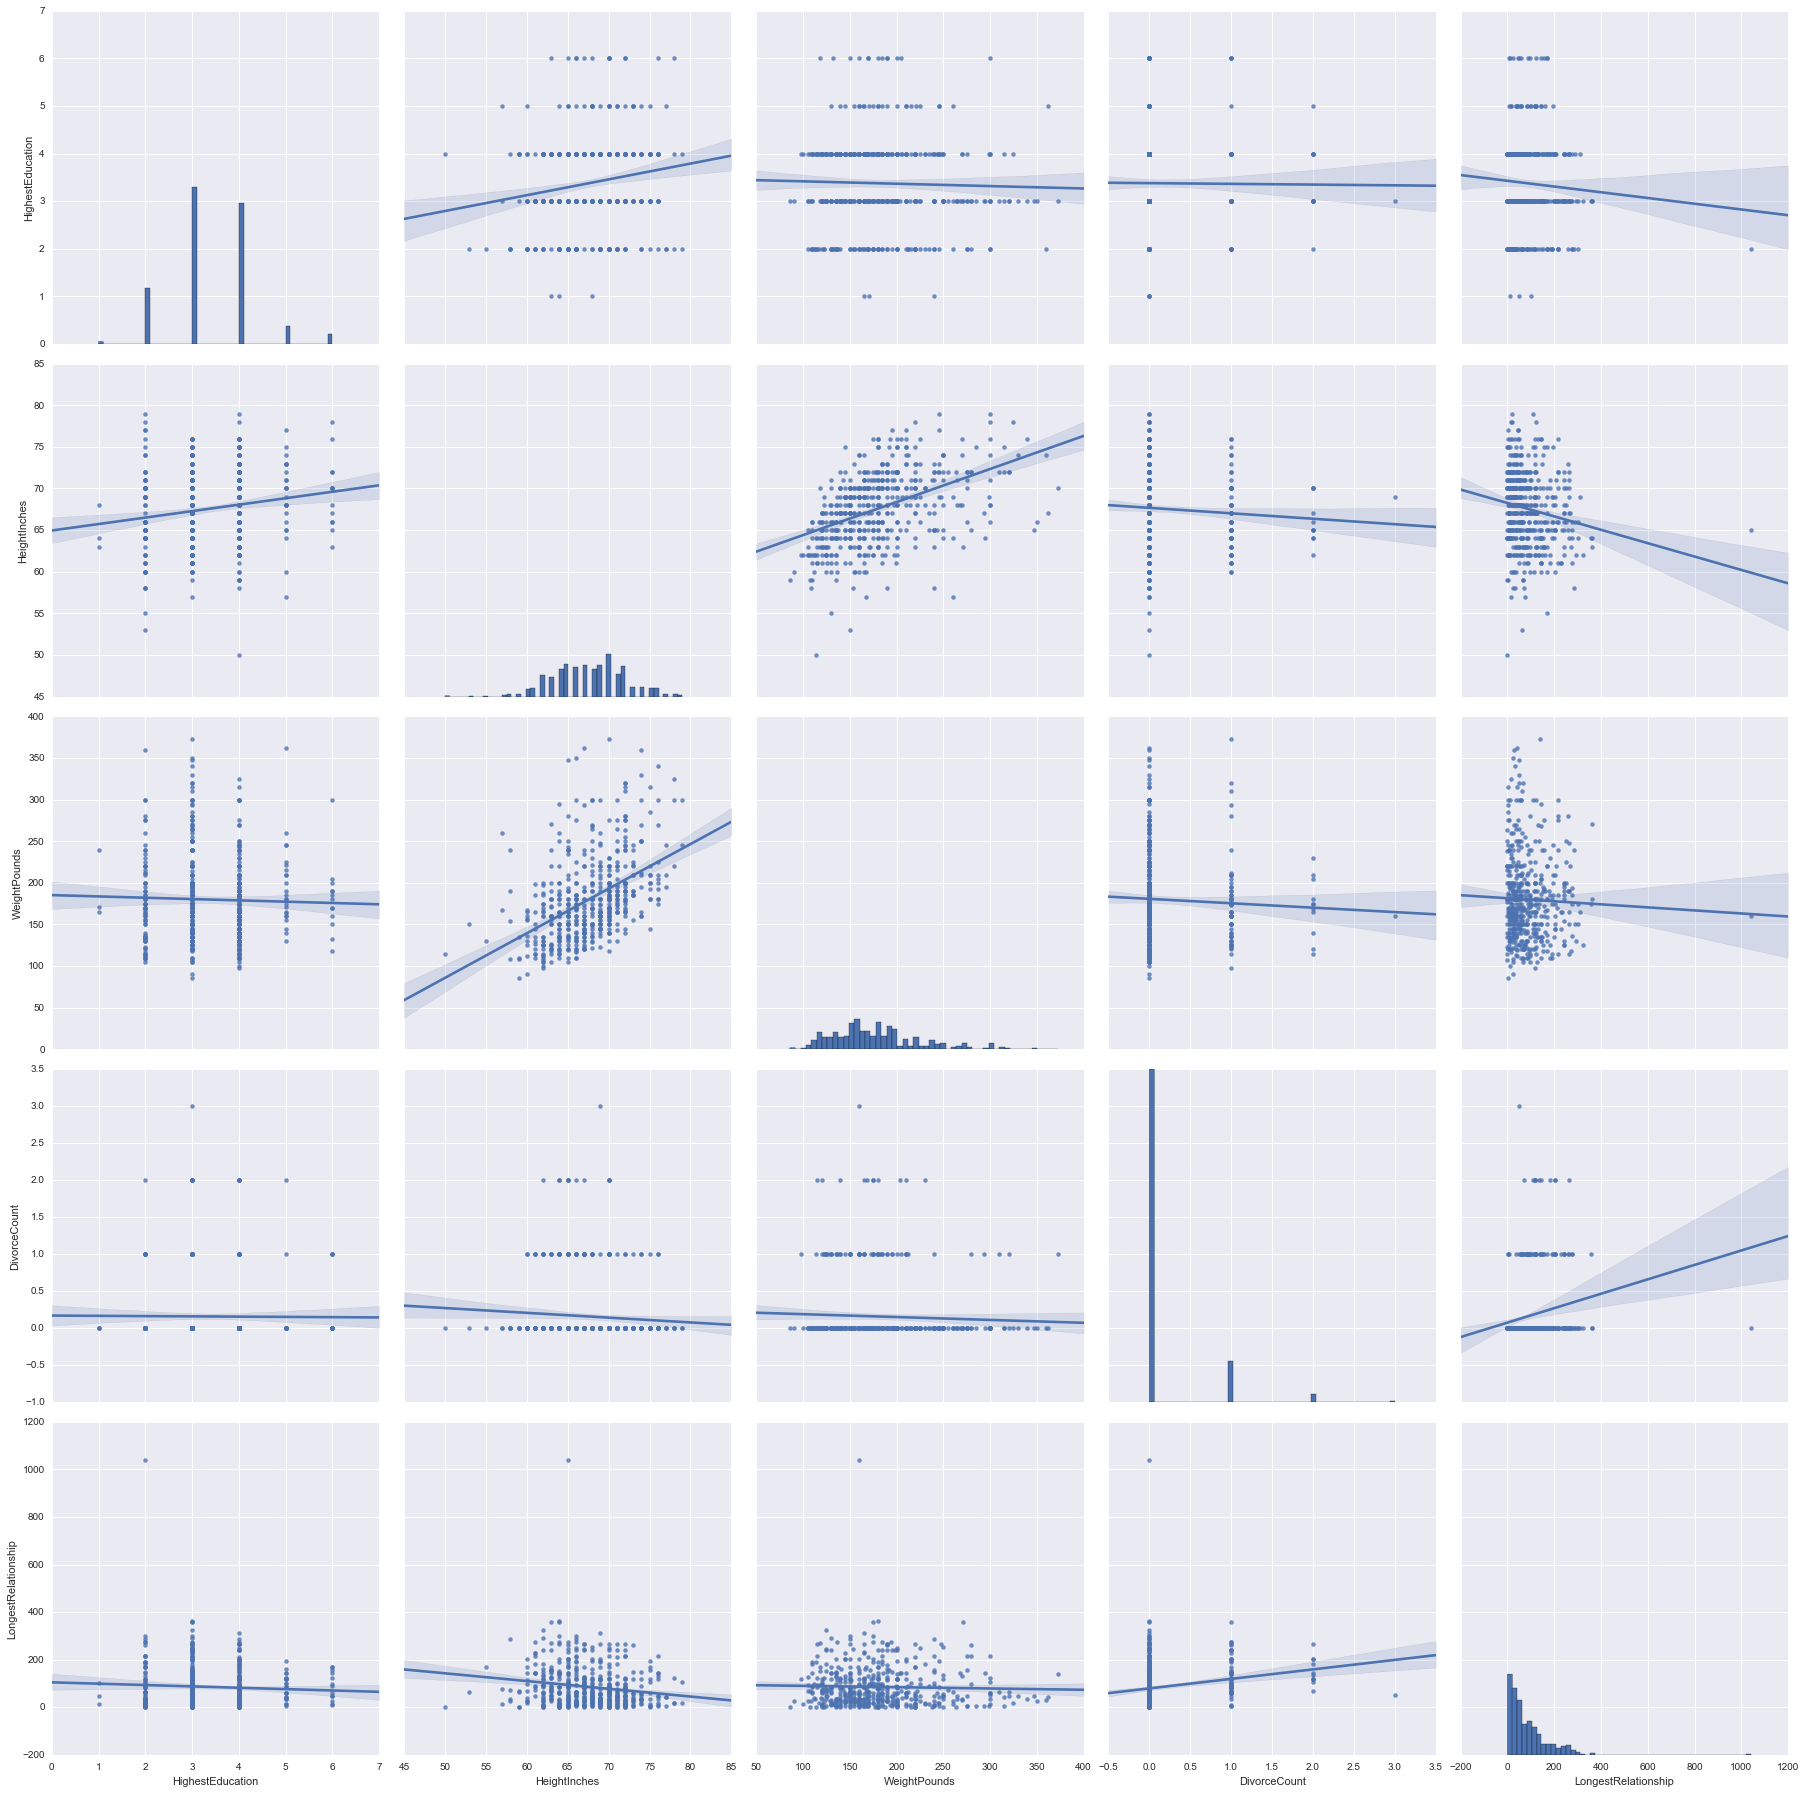

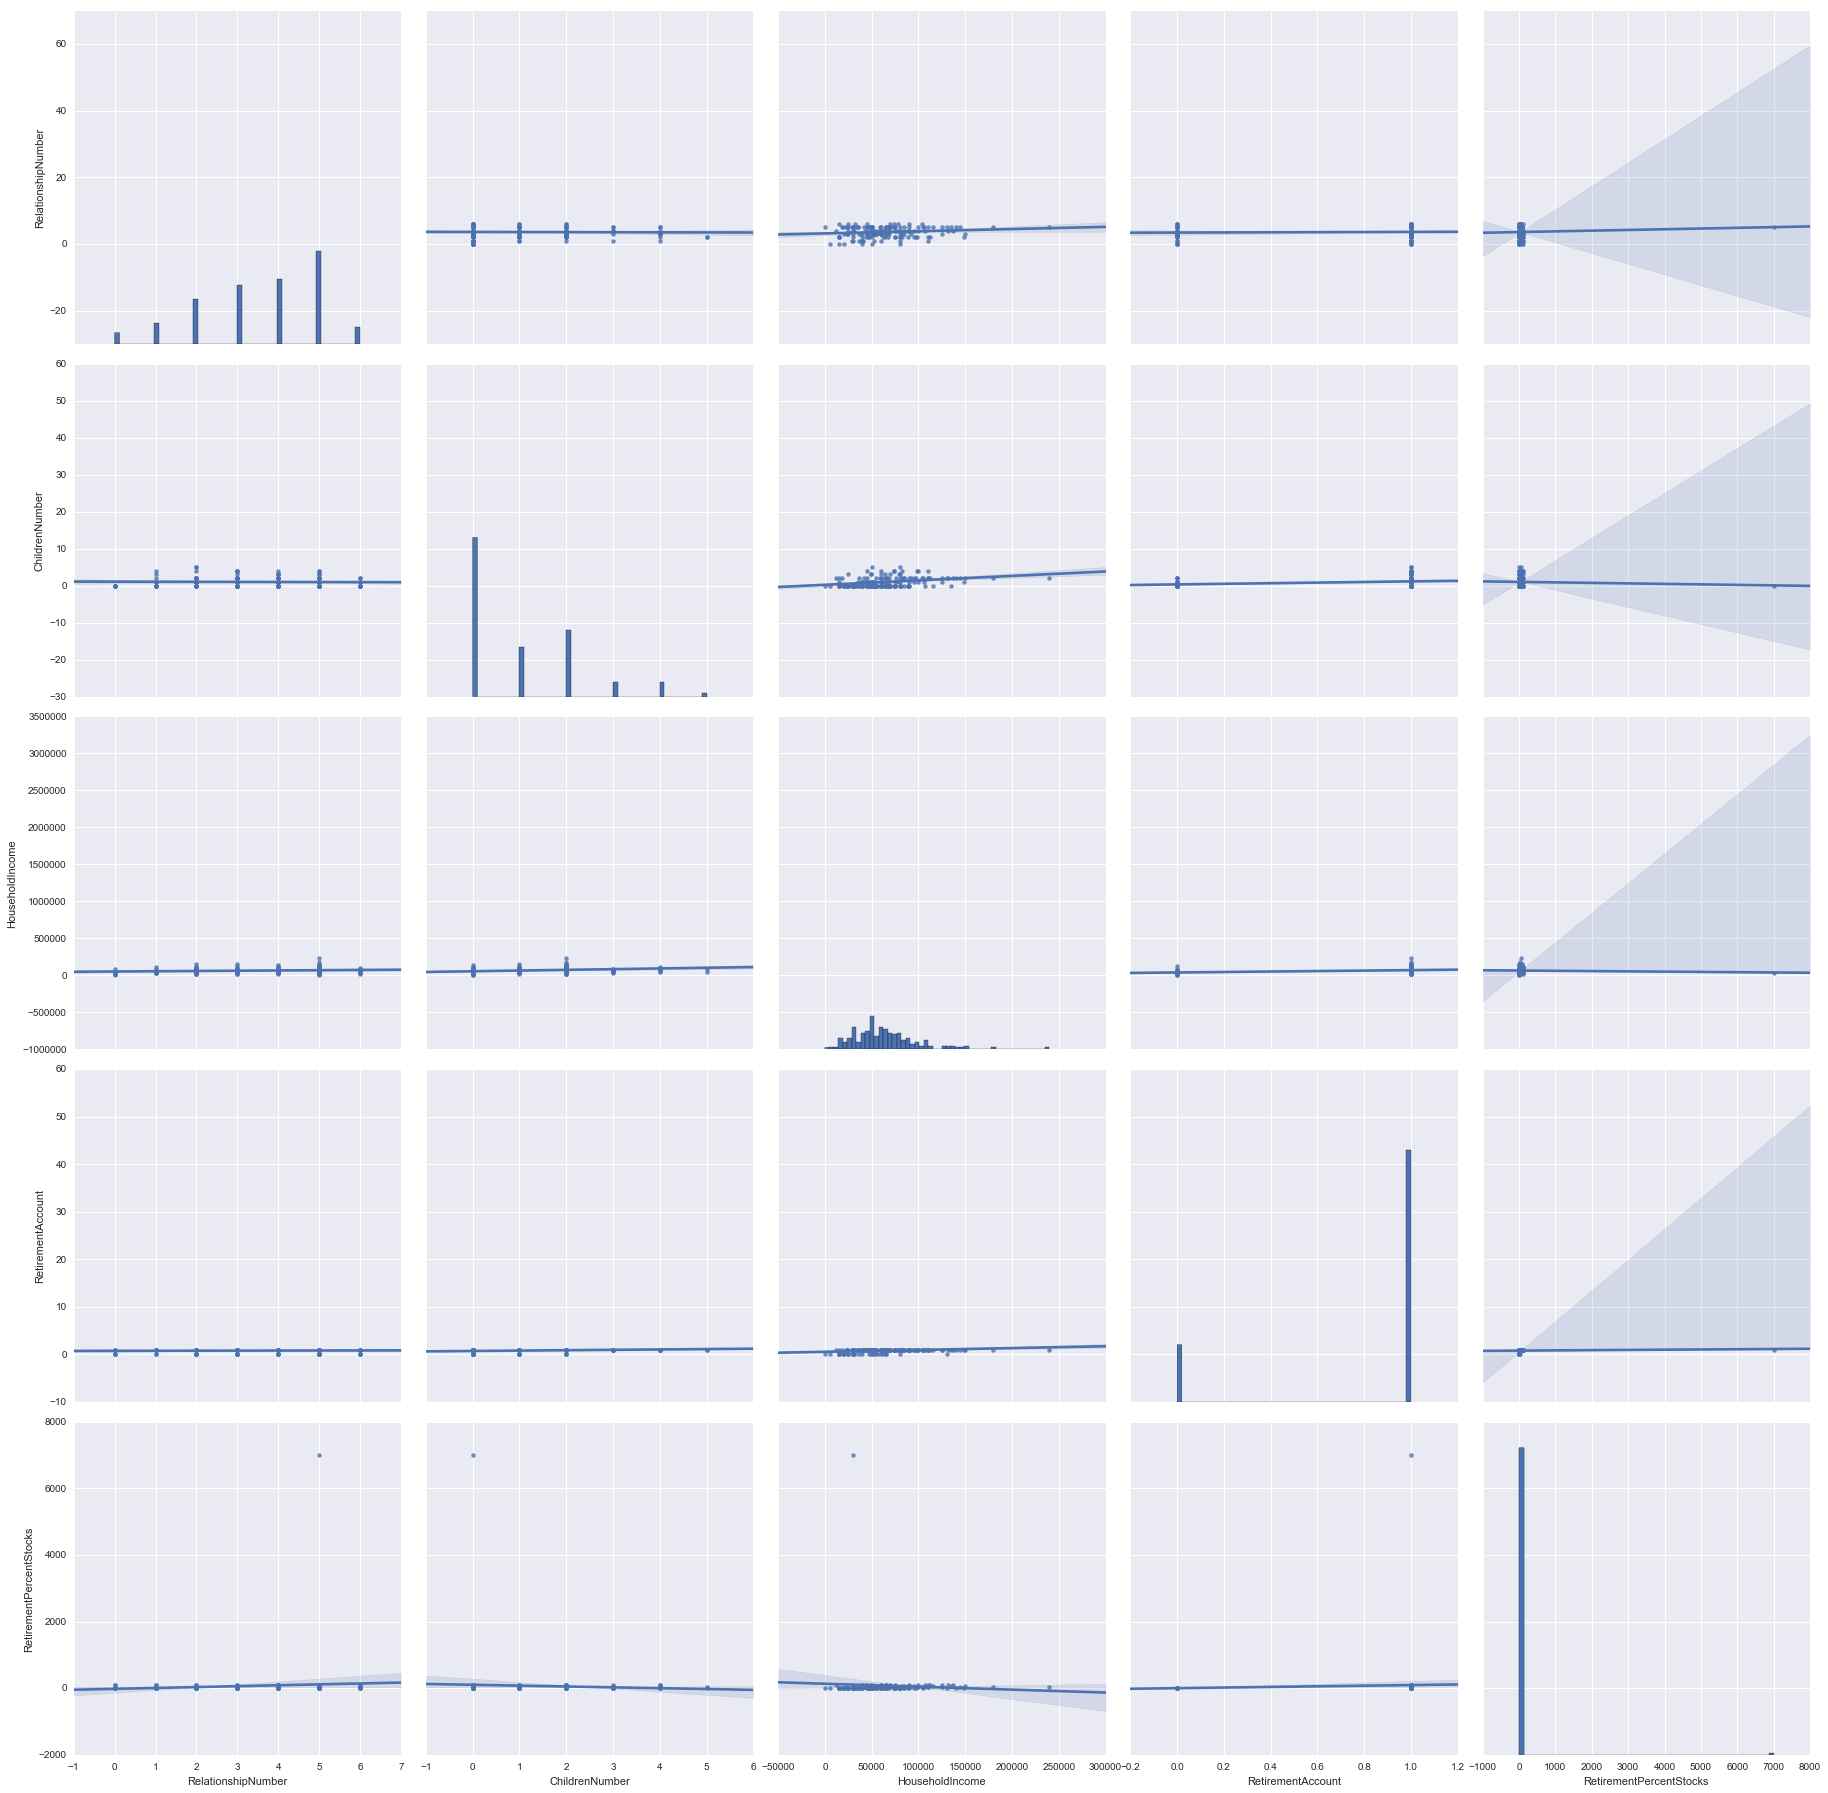

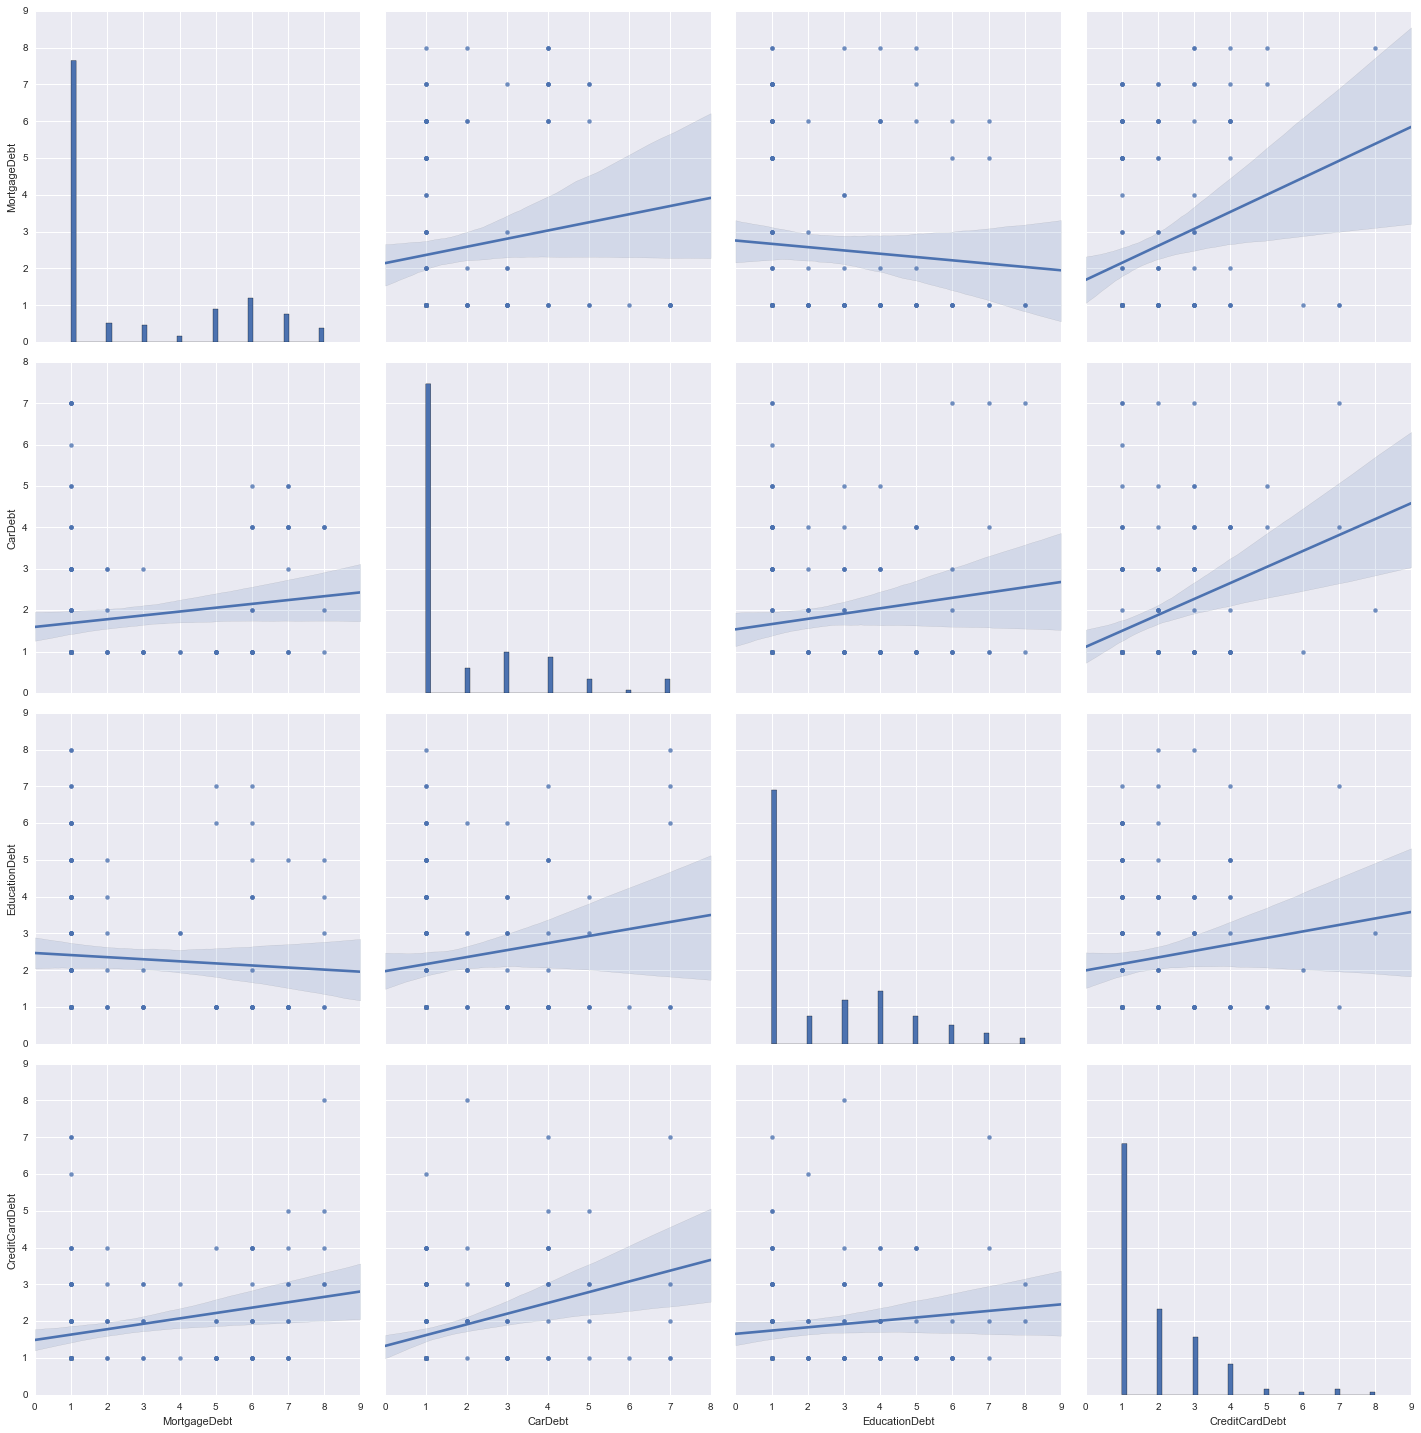

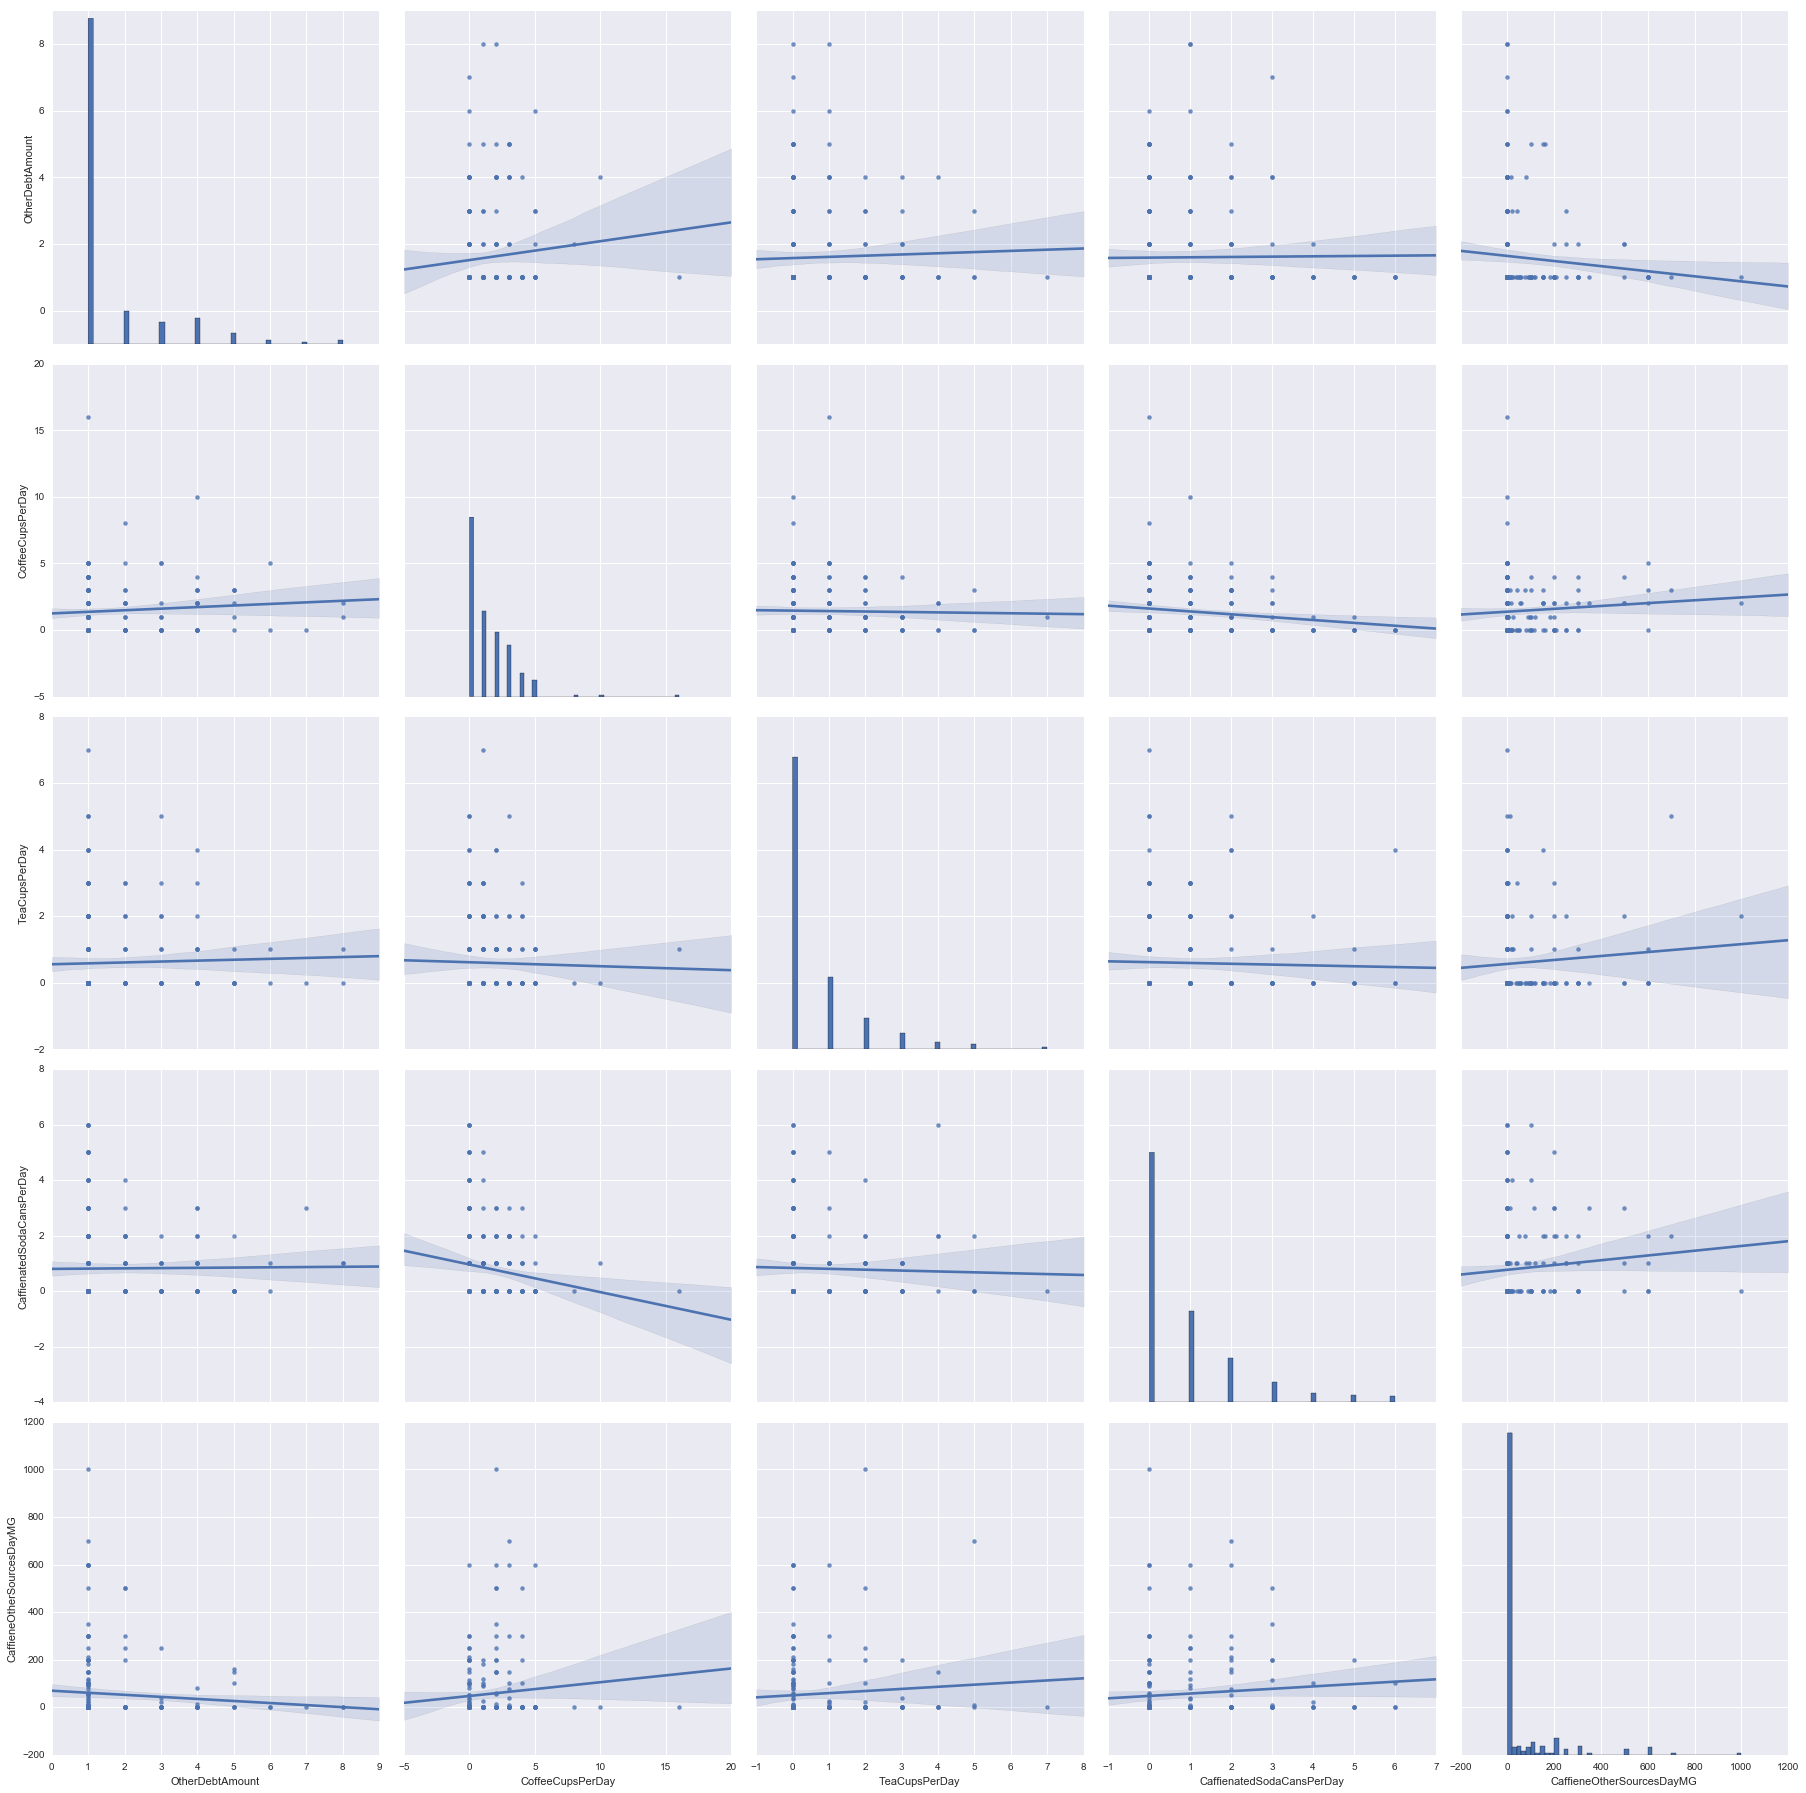

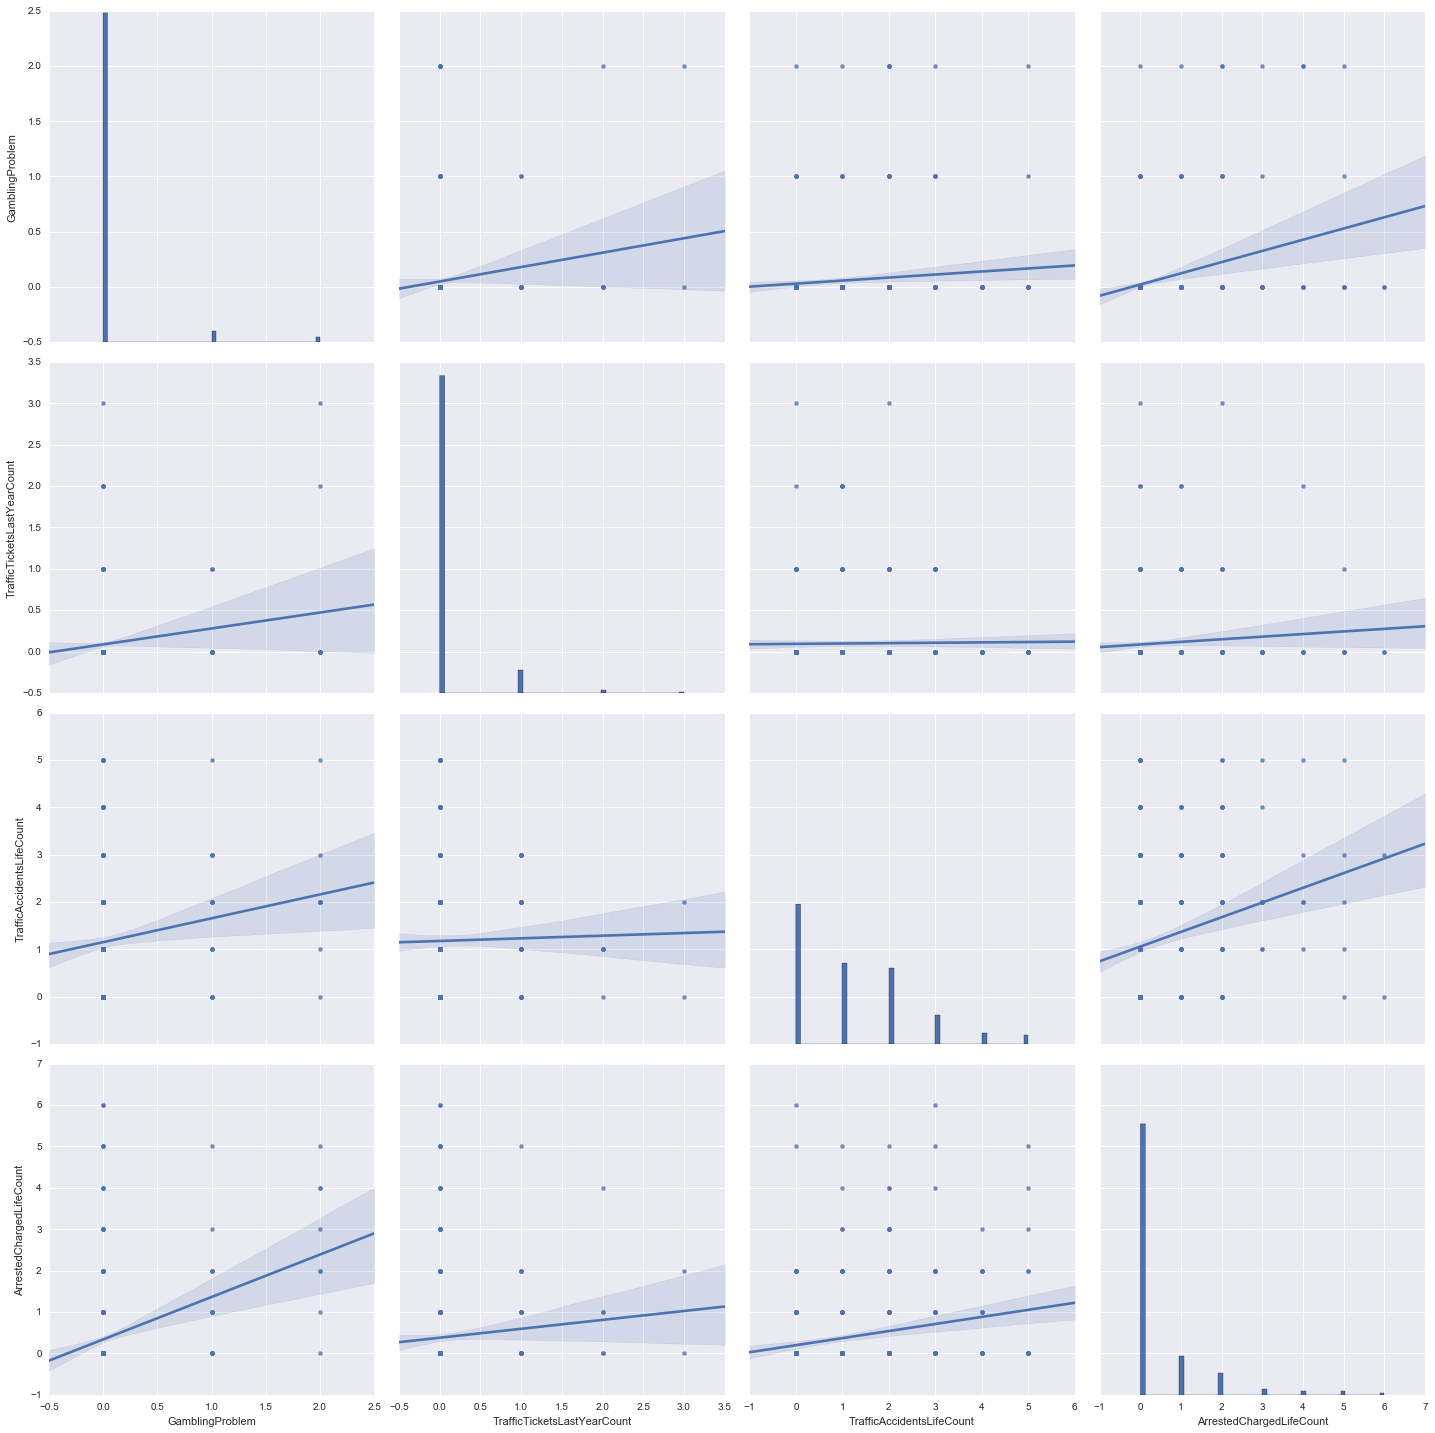

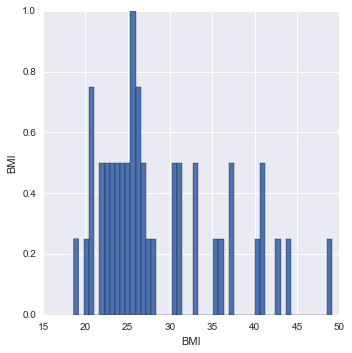

In [16]:
ncols=5
for i in range(numpy.ceil(demog.shape[1]/ncols).astype('int')):
    start=i*ncols
    end=(i+1)*ncols
    subset=demog.ix[:,start:end].copy()
    subset = subset.dropna(how = 'all').dropna(axis = 0)
    p = sns.pairplot(subset, kind = 'reg', size = 5, diag_kws = {'bins': 50})


### Factor analyses of demographic/health data


In [17]:
demog_ord=pandas.read_csv(os.path.join(derived_dir,'surveydata/demographics_ordinal.tsv'),delimiter='\t',index_col=0)
demog_ord['BMI']=demog_ord['WeightPounds']*0.45 / (demog_ord['HeightInches']*0.025)**2
del demog_ord['WeightPounds']
del demog_ord['HeightInches']

healthdata_ord=pandas.read_csv(os.path.join(derived_dir,'surveydata/health_ordinal.tsv'),delimiter='\t',index_col=0)
drugdata_ord=pandas.read_csv(os.path.join(derived_dir,'surveydata/alcohol_drugs_ordinal.tsv'),delimiter='\t',index_col=0)

all_data=demog_ord.merge(healthdata_ord,left_index=True,right_index=True)
all_data=all_data.merge(drugdata_ord,left_index=True,right_index=True)

# drop some bad variables, due to highly skewed distributions
dropvars=[]
threshold=0.1
for v in all_data.columns:
    if all_data[v].mean()<threshold:
        dropvars.append(v)
print('dropping:',dropvars)
for d in dropvars:
    del all_data[d]

all_data.shape
cdata=numpy.array(all_data)
goodvars=numpy.sum(numpy.isnan(cdata),0)==0
cdata=cdata[:,goodvars]
varnames_all_data=list(all_data.columns)
varnames=[varnames_all_data[i] for i in range(len(varnames_all_data)) if goodvars[i]]
print(cdata.shape)

NameError: name 'derived_dir' is not defined

In [ ]:
%%R -i cdata,varnames
library(psych)
df=data.frame(cdata)
names(df)=varnames
pdf(file='iclust.pdf',width=16, height=16)
ic=iclust(df)
iclust.diagram(ic,cex=1.5)
dev.off()